# Práctica Machine Learning KC

## Problema de regresión para predecir el precio de un airbnb 

En este ejercicio se pide predecir el precio de un aribnb basado en un dataset real de datos de apartamentos en alquiler en todo el mundo. Ya que la variable objetivo, que es el precio, es un valor continuo debemos aplicar algoritmos de regresión en lugar de clasificación, que serían más útiles para datos discretos.

## 1. Carga de datos, limpieza y división train/test 

En primer lugar, se va a echar un vistazo previo a los datos, eliminando todos aquellos campos que no nos interesen como URLs, reseñas...

Así pues, se han eliminado lo ssiguientes campos del data set original, que se consideran que no aportan valor:
* Listing Url
* Scrape ID
* Last Scraped
* Name (con el ID es suficiente)
* Summary
* Space
* Description
* Experience
* Neighborhood Overview
* Notes
* Transit
* Access
* Interaction 
* House Rules
* Thumbnail Url	
* Medium Url	
* Picture Url	
* XL Picture Url
* Host ID
* Host URL
* Host Name
* Host Since
* Host Location
* Host About
* Host Response Time
* Host Response Rate
* Host Acceptance Rate
* Host Thumbnail Url	
* Host Picture Url	
* Host Neighbourhood
* Host Listings Count	
* Host Total Listings Count	
* Host Verifications
* Street
* Neighbourhood	
* Neighbourhood Cleansed
* State	
* Zipcode	
* Market	
* Smart Location	
* Country Code	
* Country	
* Latitude	
* Longitude
* Bed Type
* Square Feet
* Weekly Price	
* Monthly Price	
* Security Deposit	
* Cleaning Fee	
* Guests Included
* Extra People	
* Minimum Nights
* Maximum Nights
* Calendar Updated	
* Has Availability	
* Availability 30	
* Availability 60	
* Availability 90	
* Availability 365	
* Calendar last Scraped
* First Review	
* Last Review
* Review Scores Accuracy	
* Review Scores Cleanliness	
* Review Scores Checkin	
* Review Scores Communication	
* Review Scores Location	
* Review Scores Value	
* License	Jurisdiction Names
* Cancellation Policy	
* Calculated host listings count

Así pues, nos quedaremos con los siguientes atributos:


| Atributo              | Descripción                                      |
| :-                    | :-                                               |
| *City*                | Ciudad donde se encuentra la vivienda            |
| *Property Type*       | Tipo de propiedad (loft, apartamento, etc.)      |
| *Room Type*           | Tipo de habitación (entera, privada, compartida) |
| *Accommodates*        | Número de personas que puede alojar              |
| *Bathrooms*           | Número de baños/aseos                            |
| *Bedrooms*            | Número de habitaciones                           |
| *Beds*                | Número de camas                                  |
| *Bed Type*            | Tipo de cama (individual, doble, etc.)           |
| *Amenities*           | Servicios y comodidades disponibles              |
| *Number of Reviews*   | Número de reseñas                                |
| *Review Scores Rating*| Puntuación de las reseñas                        |
| *Reviews per Month*   | Número de reseñas por mes                        |
| *Geolocation*         | Ubicación geográfica (latitud y longitud)        |
| *Features*            | Características adicionales                      |
| *Price*               | Precio de la vivienda                            |

A continuación, procedemos a cargar los datos para proceder con su visualización:


In [2]:
# Importamos las librerias necesarias
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [3]:
house_data = pd.read_csv("./data/airbnb-listings-extract-cleaned.csv", sep=';', encoding = "latin")
print(house_data.shape)
house_data.head(5).T  

(14780, 16)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5
Bathrooms,10.0,10.0,10.0,20.0,10.0
Bedrooms,1.0,1.0,1.0,3.0,2.0
Beds,1.0,1.0,1.0,4.0,2.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Amenities,"TV,Cable TV,Internet,Wireless Internet,Air con...","Wireless Internet,Air conditioning,Elevator in...","Wireless Internet,Air conditioning,Elevator in...","TV,Internet,Wireless Internet,Air conditioning...","TV,Wireless Internet,Air conditioning,Kitchen,..."


Visualizando los datos se observan varios problemas que pueden afectar al entrenamiento de los modelos. 

En primer lugar se detecta un número inusualmente de baños, ya que no tiene mucho sentido que un apartamento con capacidad para 2 personas tenga 10 baños. Esto puede deberse a un error en la carga de datos, por eso, se ha confirmado que al importar el csv con excel para eliminar las columnas no deseadas ha habido un error. En el dataset original, el atributo bathrooms es de tipo float e incluía un punto que separaba la parte entera de la decimal. Al importar los datos se ha eliminado el punto que los separaba, por lo que se va a dividir entre 10 todos los valores de este atributo.

In [4]:
house_data['Bathrooms'] = house_data['Bathrooms'] / 10
house_data.head(5).T  

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0
Beds,1.0,1.0,1.0,4.0,2.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Amenities,"TV,Cable TV,Internet,Wireless Internet,Air con...","Wireless Internet,Air conditioning,Elevator in...","Wireless Internet,Air conditioning,Elevator in...","TV,Internet,Wireless Internet,Air conditioning...","TV,Wireless Internet,Air conditioning,Kitchen,..."


Por lo demás no se observan más errores en la carga, por lo que pasamos a dividir los conjuntos de train y test antes de la imputación y limpieza de datos. Esto se realiza antes para evitar un posible sesgo en los datos, para tener una correcta validación al tener un conjunto de datos de test intactos antes de la evaluación del rendimiento del modelo y una simulación de valores reales. 

Para la separación de los conjuntos se va a utilizar la fuinción `train_test_split` de sklearn. Adicionalmente se va a dividir un 80% en el conjunto de train y un 20% para el conjunto de test, y se va a realizar el suffle para mezclar los datos y evitar el sesgo en caso de que los datos pudieran estar ordenados.


In [5]:
train, test = train_test_split(house_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/house_data_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/house_data_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./data/house_data_train.csv', sep=';', decimal='.')
house_data.head(5).T

Dimensiones del dataset de training: (11824, 16)
Dimensiones del dataset de test: (2956, 16)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
City,Madrid,Madrid,Madrid,Madrid,Madrid
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Amenities,"TV,Internet,Wireless Internet,Air conditioning...","TV,Internet,Wireless Internet,Air conditioning...","Internet,Wireless Internet,Wheelchair accessib...","Wireless Internet,Kitchen,Smoking allowed,Heat...","TV,Cable TV,Internet,Wireless Internet,Air con..."


## 2. Análisis exploratorio

Vamos a proceder al análisis de los datos viendo usando funciones de Pandas para intentar sacar conclusiones a cerca de los datos.

In [6]:
house_data.describe()

,ID,Accommodates,Bathrooms,Bedrooms,Beds,Number of Reviews,Review Scores Rating,Reviews per Month,Price
count,1.182400e+04,11824.000000,11780.000000,11804.00000,11787.000000,11824.000000,9163.000000,9285.000000,11809.000000
mean,1.025308e+07,3.277486,1.285229,1.34429,2.049122,22.664834,91.628179,163.085407,73.712592
std,5.566485e+06,2.093973,0.664691,0.90518,1.623489,38.092338,9.137614,183.128112,71.624844
min,1.986400e+04,1.000000,0.000000,0.00000,1.000000,0.000000,20.000000,1.000000,9.000000
25%,5.510692e+06,2.000000,1.000000,1.00000,1.000000,1.000000,89.000000,29.000000,34.000000
50%,1.125754e+07,3.000000,1.000000,1.00000,2.000000,7.000000,94.000000,88.000000,55.000000
75%,1.531982e+07,4.000000,1.000000,2.00000,2.000000,27.000000,98.000000,243.000000,87.000000
max,1.858361e+07,16.000000,8.000000,10.00000,16.000000,356.000000,100.000000,1721.000000,969.000000


El método `describe()` nos arroja los principales valores estadísticos y nos permite sacar las siguientes conclusiones:
1. Vemos que en el conteo de atributos no todas las columnas tienen el valor 11824, por lo que va a ver atributos nulos. Más adelante se decidirá qué hacer con ellos.
2. La fila MAX nos arroja información que puede tratarse de outliers. Por ejemplo, vemos que algún apartamento recibe 1721 reviews al mes, lo cual a priori parece algo elevado, aunque puede ser real ya que suponiendo que tiene una capacidad para 16 huéspedes (el máximo) si cada día cambiara de huéspedes y todo el mes alquilara las 16 plazas, suponiendo que todos los huéspedes dejan una reseña, podría tener como máximo 16 * 30 =  480 reseñas en un mes. 

Para saber qué atributos tienen valores nulos vamos a ejecutar las funciones `isnull().any()`:

In [7]:
house_data.isnull().any()

ID                      False
City                     True
Property Type           False
Room Type               False
Accommodates            False
Bathrooms                True
Bedrooms                 True
Beds                     True
Bed Type                False
Amenities                True
Number of Reviews       False
Review Scores Rating     True
Reviews per Month        True
Geolocation             False
Features                 True
Price                    True
dtype: bool

En función del atributo, vamos a completar los valores nulos con la media o con 0 para valores numéricos y con Unknown en caso de atributos de tipo texto.

### Media
* Bathrooms
* Bedrooms
* Beds
* Price. En este caso nos interesa que sea la media ya que es nuestra variable objetivo.

### Valor 0
* Review Scores Rating
* Reviews per Month 

### Unknown 
* City 
* Amenities
* Features

In [8]:
house_data['Bathrooms'].fillna(house_data['Bathrooms'].mean(), inplace=True)
house_data['Bedrooms'].fillna(house_data['Bedrooms'].mean(), inplace=True)
house_data['Beds'].fillna(house_data['Beds'].mean(), inplace=True)
house_data['Price'].fillna(house_data['Price'].mean(), inplace=True)

house_data['Review Scores Rating'].fillna(house_data['Review Scores Rating'].mode()[0], inplace=True)
house_data['Reviews per Month'].fillna(house_data['Reviews per Month'].mode()[0], inplace=True)

house_data['City'].fillna('Unknown', inplace=True)
house_data['Amenities'].fillna('Unknown', inplace=True)
house_data['Features'].fillna('Unknown', inplace=True)

house_data.isnull().any()

ID                      False
City                    False
Property Type           False
Room Type               False
Accommodates            False
Bathrooms               False
Bedrooms                False
Beds                    False
Bed Type                False
Amenities               False
Number of Reviews       False
Review Scores Rating    False
Reviews per Month       False
Geolocation             False
Features                False
Price                   False
dtype: bool

Es importante tener en cuenta que probablemente este no sea el conjunto final de datos de entrenamiento final, ya que puede que identifiquemos ciertas variables con poca correlación con el precio o que aportan poca información o mucho error. Por ejemplo, antes veíamos que hay algunos atributos que tienen una gran cantidad de nulos, y con la imputación podemos incluir mucho sesgo.

En primer lugar, vamos a ver la correlación entre las distintas variables numéricas:

<Axes: >

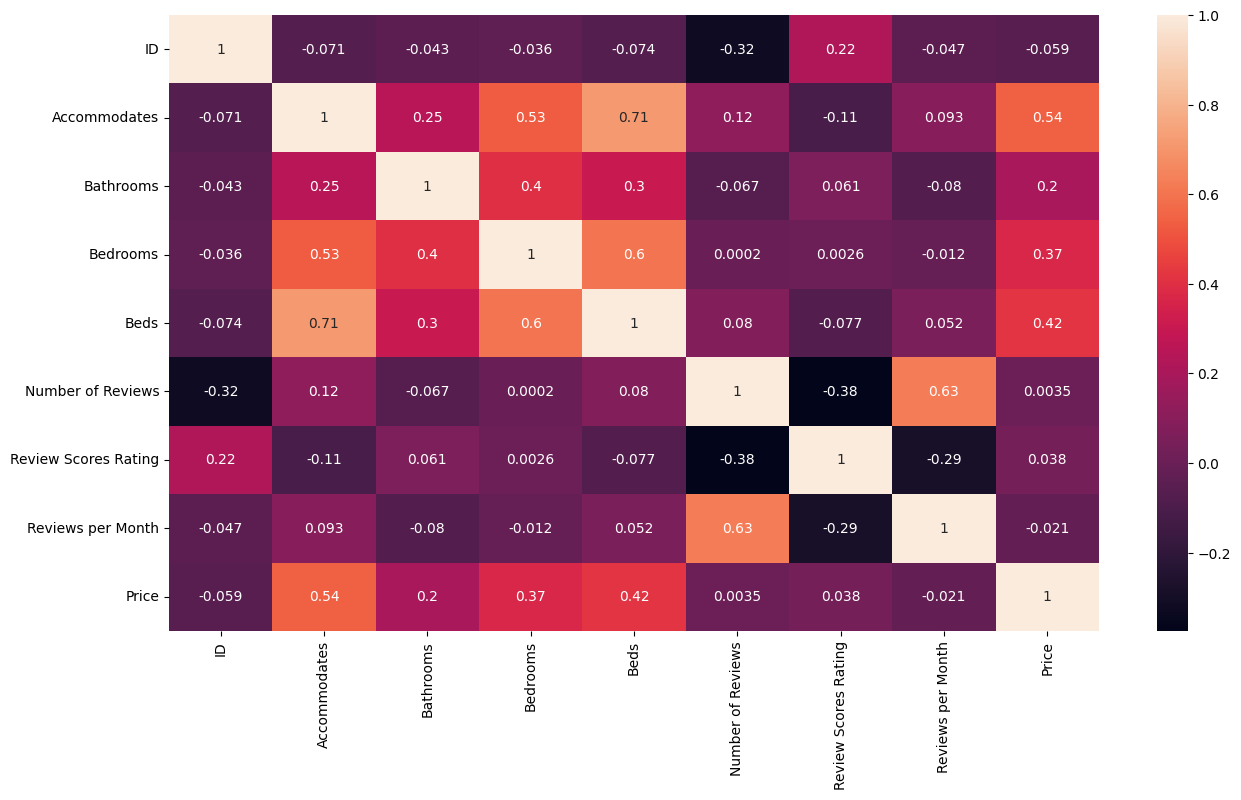

In [9]:
numeric_data = house_data.select_dtypes(include=[np.number])
corr = numeric_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Viendo la última fila observamos que las principales variables numéricas que influyen en el precio son el número de inquilinos, el número de habitaciones, el número de camas y el número de baños en ese orden, lo cual tiene bastante sentido ya que las otras tres variables hacen referencia a las reviews, y estas pueden ser buenas o malas independientemente del precio que tengan. 

Al solo comparar variables numéricas ignoramos información bastante importante como la ciudad ya que, por la ley de oferta/demanda, un apartamento en Soria seguramente no cueste lo mismo que en NYC, aunque tengan el mismo número de inquilinos, habitaciones...

Otras variables que se ven afectadas al no ser valores numéricos son *Amenities* (que se refiere a las comodidades que incluye el apartamento como TV, WIFI...) y *Features* (que se refiere a las características extra que incluye el anuncio como Foto de perfil del arrendador). Se considera que estas variables pueden tener una alta relación en el precio, por ello, se va a generar una nueva columna con el conteo de cada una de estas variables y se volverá a ver la relación con el precio para vcer si efectivamente el número de comodidades y características influye positivamente en el precio de los airbnb. 

In [10]:
house_data['Amenities_count'] = house_data['Amenities'].apply(lambda x: len(x.split(',')))
house_data['Features_count'] = house_data['Features'].apply(lambda x: len(x.split(',')))
house_data.head(5).T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
City,Madrid,Madrid,Madrid,Madrid,Madrid
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Amenities,"TV,Internet,Wireless Internet,Air conditioning...","TV,Internet,Wireless Internet,Air conditioning...","Internet,Wireless Internet,Wheelchair accessib...","Wireless Internet,Kitchen,Smoking allowed,Heat...","TV,Cable TV,Internet,Wireless Internet,Air con..."


Volvemos a sacar el mapa de correlación:

<Axes: >

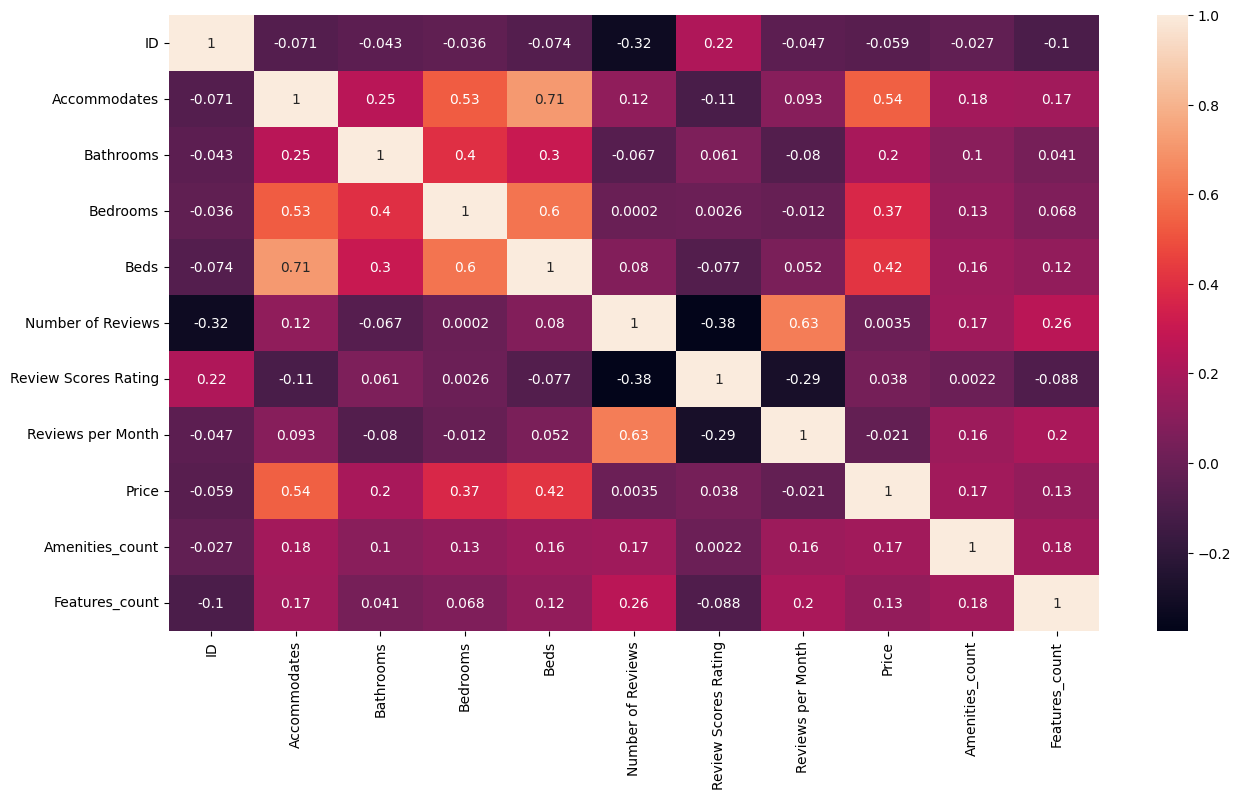

In [11]:
numeric_data = house_data.select_dtypes(include=[np.number])
corr = numeric_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Viendo el resultado, vemos que tampoco parece influir demasiado en el precio, al no haber mucha correlación. Es cierto que estas variables pueden verse afectadas por la imputación realizada anteriormente, ya que hemos rellenado los valores vacíos con la palabra Unknown y eso contaría como 1 solo Amenity. 

En cualquier caso, mantendremos estas variables y que sea el modelo quien decida qué variables son realmente importantes. 

A continuación vamos a codificar las variables categóricas Room Type y Property Type usando target encoder:

In [15]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['Room Type'])
house_data['room_type_encoded'] = target_encoder.fit_transform(house_data['Room Type'], house_data['Price'])
target_encoder = ce.TargetEncoder(cols=['Property Type'])
house_data['property_type_encoded'] = target_encoder.fit_transform(house_data['Property Type'], house_data['Price'])

In [13]:
house_data.head()

,ID,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Number of Reviews,Review Scores Rating,Reviews per Month,Geolocation,Features,Price,Amenities_count,Features_count,room_type_encoded,property_type_encoded
0,5994463,Madrid,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",12,95.0,5.0,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require...",60.0,13,3,95.062893,72.295908
1,14136180,Madrid,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",20,91.0,243.0,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re...",50.0,18,4,95.062893,72.295908
2,15520134,Madrid,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",0,100.0,10.0,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is...",10.0,25,5,31.321017,72.295908
3,8809721,Madrid,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",0,100.0,10.0,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License",30.0,5,2,40.909511,72.295908
4,1162707,Madrid,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",97,92.0,208.0,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is...",32.0,15,4,40.909511,72.295908


Ahora vamos a sacar el scatter matrix para ver de un vistazo rápido la relación entre las distintas variables:

KeyboardInterrupt: 

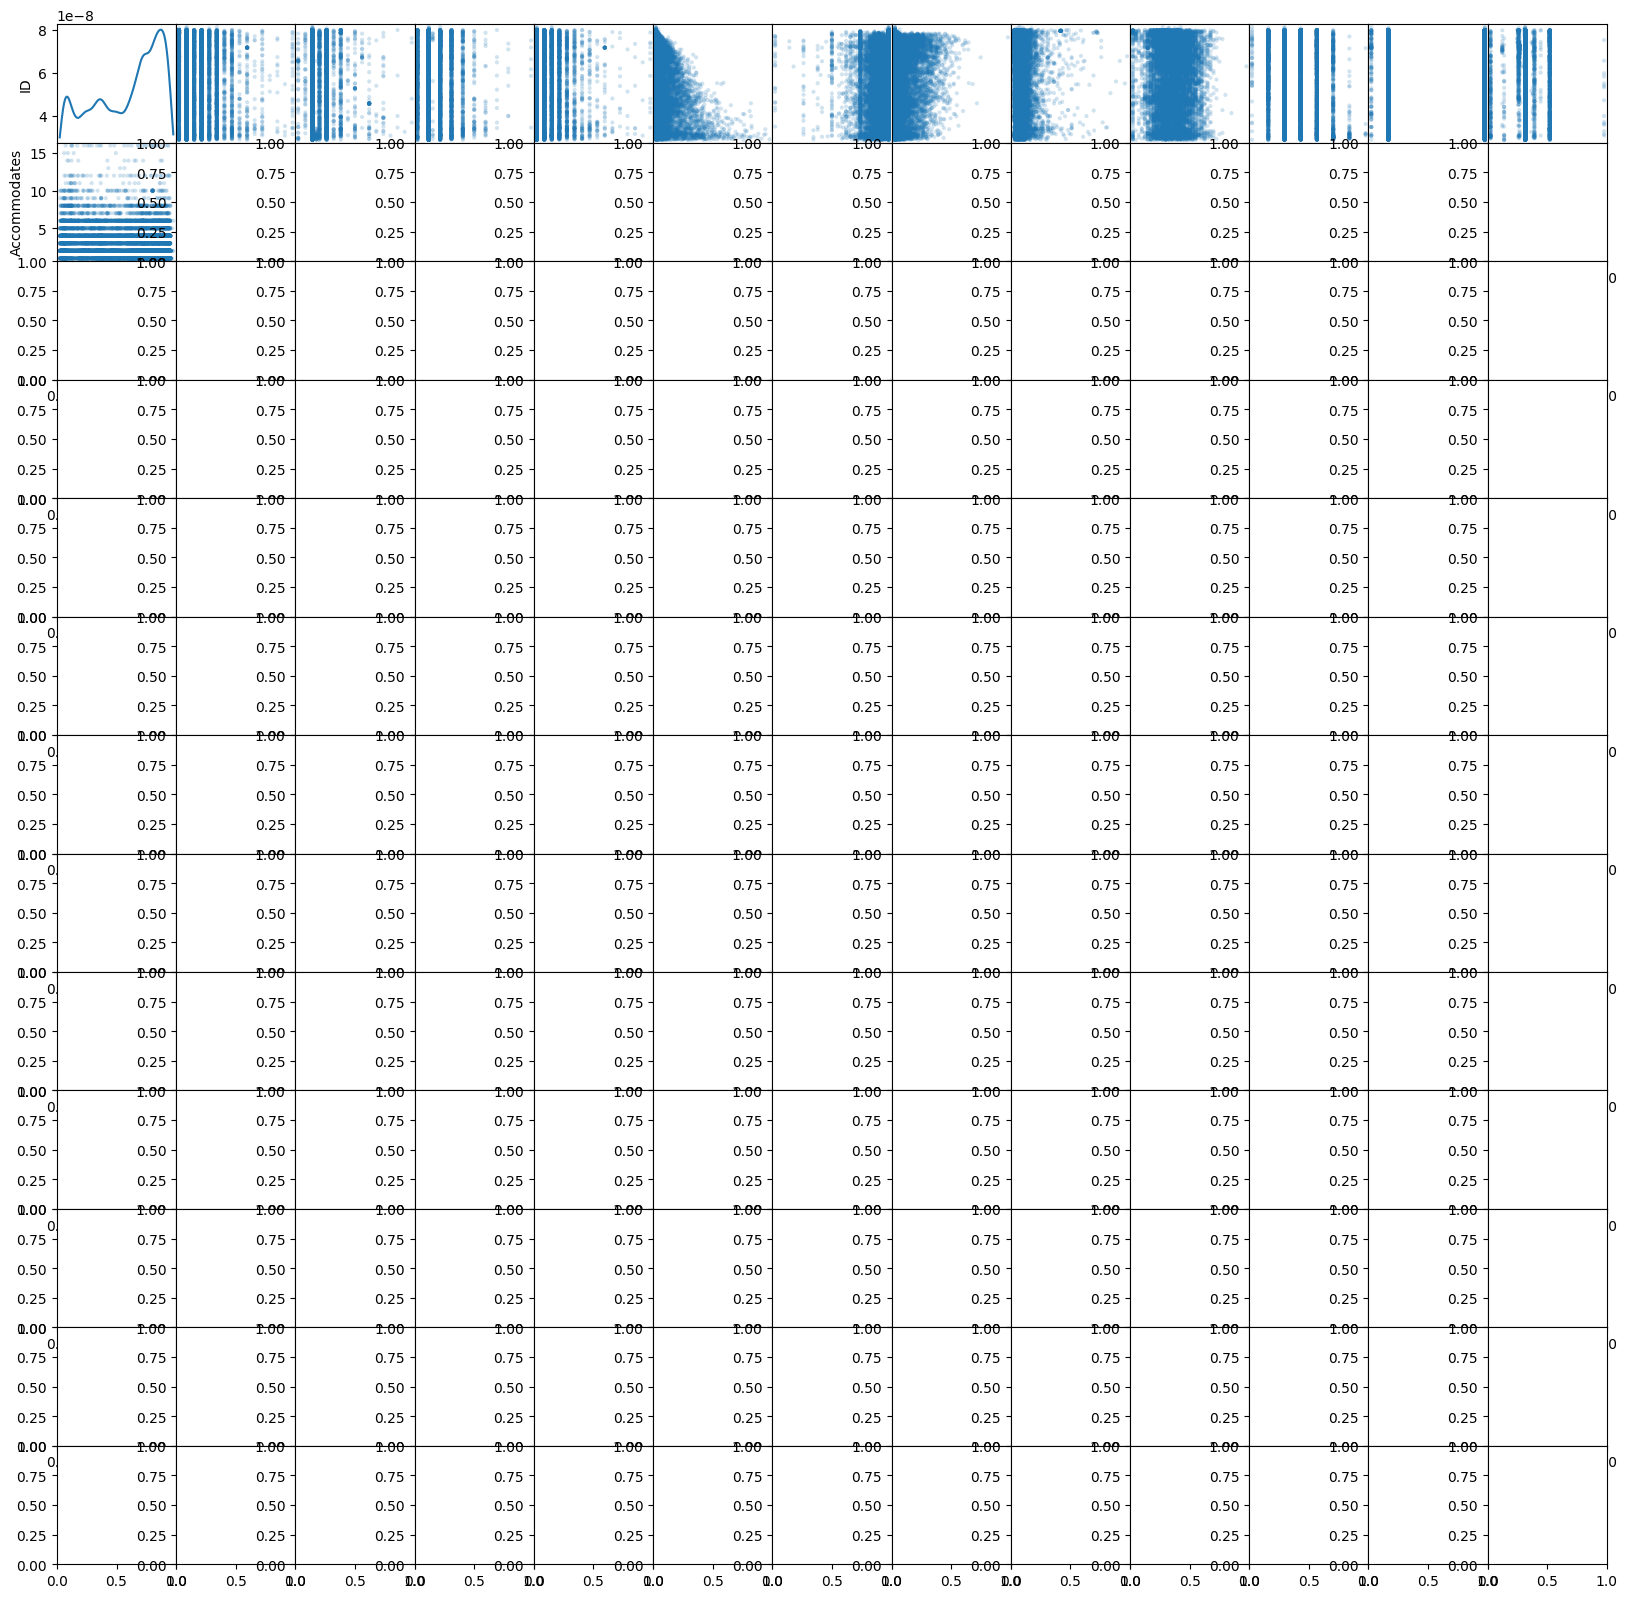

In [14]:
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()